In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
data=pd.read_csv('./Raisin_Dataset.csv')
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [3]:
#Show Key Statistics
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [7]:
#Drop the 'Class' column for the correlation matrix
numeric_df = data.drop(columns=['Class'])

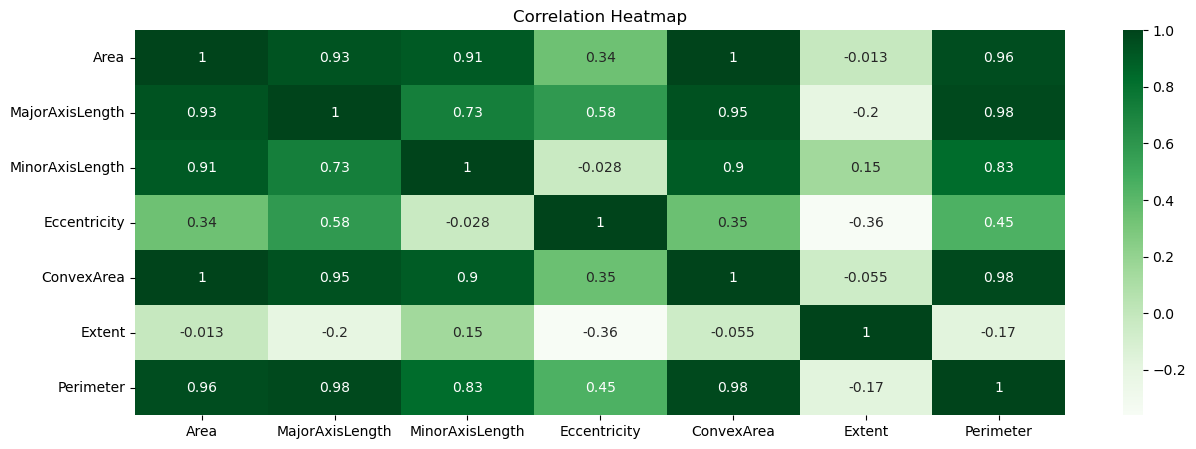

In [8]:
#Visualization of Correlations
fig = plt.figure(figsize=(15, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Greens")
plt.title('Correlation Heatmap')
plt.show()

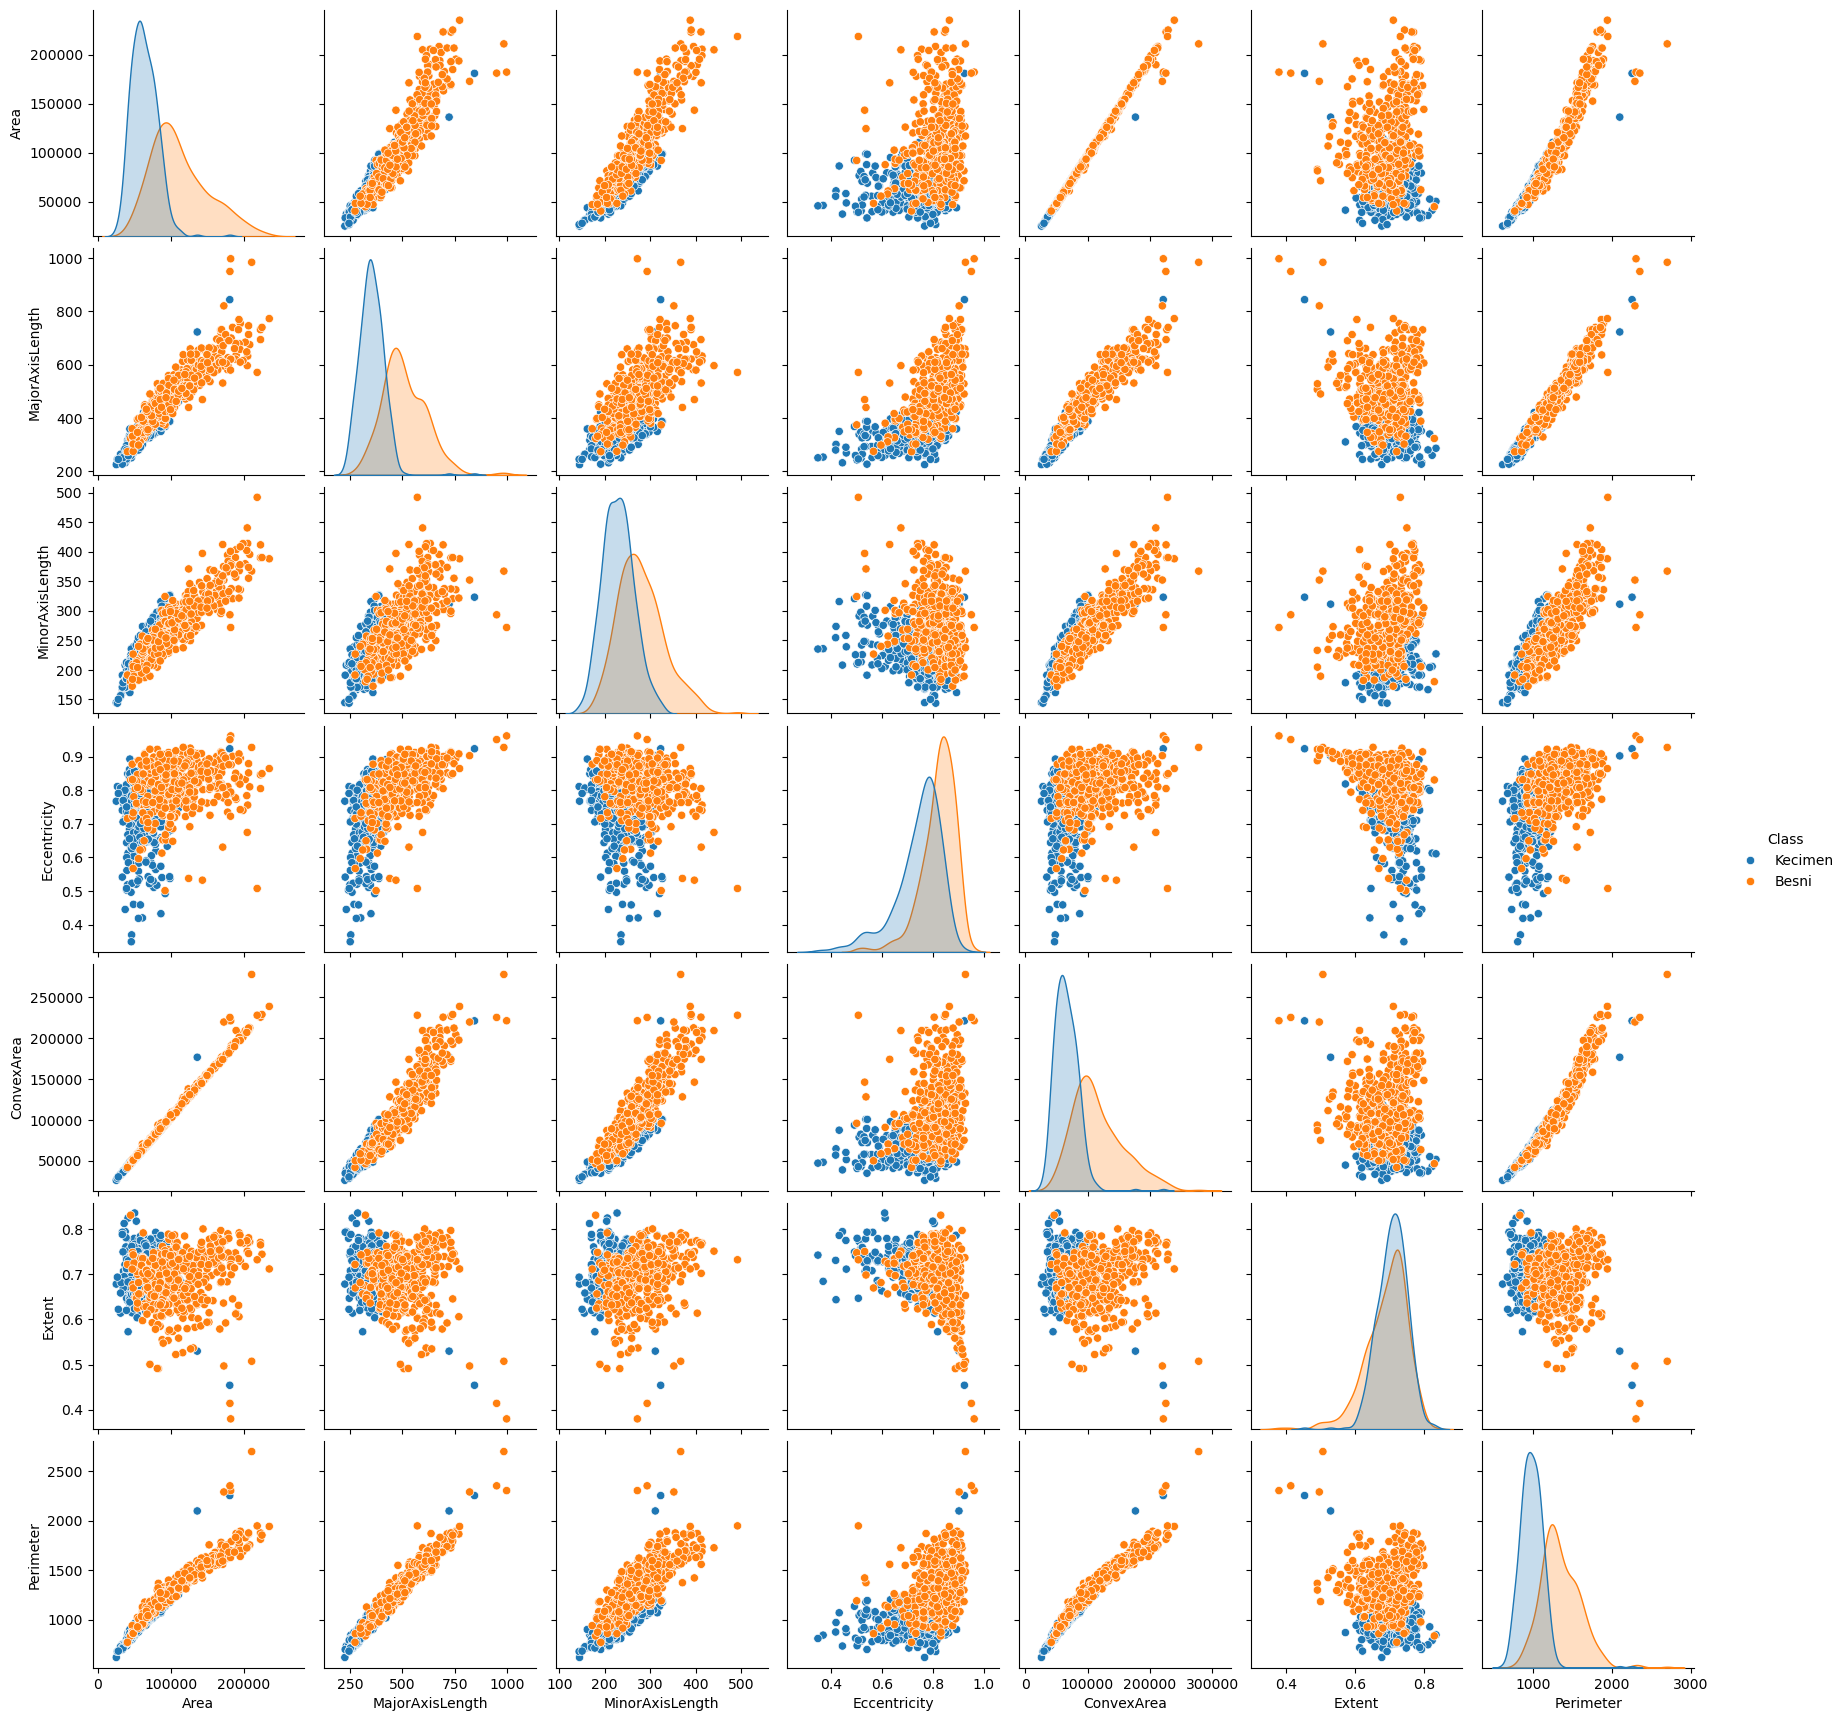

In [10]:
#Pairplot with hue=Class
sns.pairplot(data, hue ='Class')

In [11]:
#Create x and y variables
X = data.drop('Class',axis=1).to_numpy()
y = data['Class'].to_numpy()

#Create Train and Test datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.20,random_state=100)

#Scale the data
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train2 = sc.fit_transform(X_train)
x_test2 = sc.transform(X_test)

In [12]:
#Script for SVM and NB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('SVM', SVC(random_state=100)),
                    ('Naive Bayes',GaussianNB())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['Kecimen','Besni']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))


Estimator: SVM
[[74 16]
 [ 8 82]]
              precision    recall  f1-score   support

     Kecimen       0.90      0.82      0.86        90
       Besni       0.84      0.91      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Estimator: Naive Bayes
[[67 23]
 [ 7 83]]
              precision    recall  f1-score   support

     Kecimen       0.91      0.74      0.82        90
       Besni       0.78      0.92      0.85        90

    accuracy                           0.83       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.84      0.83      0.83       180



In [13]:
#Hyperparameter Tuning (For Mr. Hughes to improve performance)
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   5.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   5.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  10.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   8.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  12.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   5.8s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=  21.6s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   4.1s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   8.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=  17.2s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   5.9s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=  22.0s
[CV] END ...................

In [15]:
#Feature Scaling (improve performance suggestion 2)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
#Script for SVM and NB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('SVM', SVC(random_state=100)),
                    ('Naive Bayes',GaussianNB())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['Kecimen','Besni']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))


Estimator: SVM
[[74 16]
 [ 8 82]]
              precision    recall  f1-score   support

     Kecimen       0.90      0.82      0.86        90
       Besni       0.84      0.91      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Estimator: Naive Bayes
[[67 23]
 [ 7 83]]
              precision    recall  f1-score   support

     Kecimen       0.91      0.74      0.82        90
       Besni       0.78      0.92      0.85        90

    accuracy                           0.83       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.84      0.83      0.83       180

